In [1]:
import mphot

In [2]:
instrument_efficiency_path = "../resources/systems/speculoos_Andor_iKon-L-936_-60.csv"  # index in microns, efficiency of telescope+instrument as fraction
filter_path = (
    "../resources/filters/I+z.csv"  # index in microns, filter efficiency as fraction
)

name, system_response = mphot.generate_system_response(
    instrument_efficiency_path, filter_path
)

INFO:mphot.core:`/Users/peter/Github/mphot/src/mphot/datafiles/system_responses/speculoos_Andor_iKon-L-936_-60_I+z_instrument_system_response.csv` has been generated and saved!


<Axes: title={'center': 'speculoos_Andor_iKon-L-936_-60_I+z'}, xlabel='Wavelength (microns)', ylabel='System Response'>

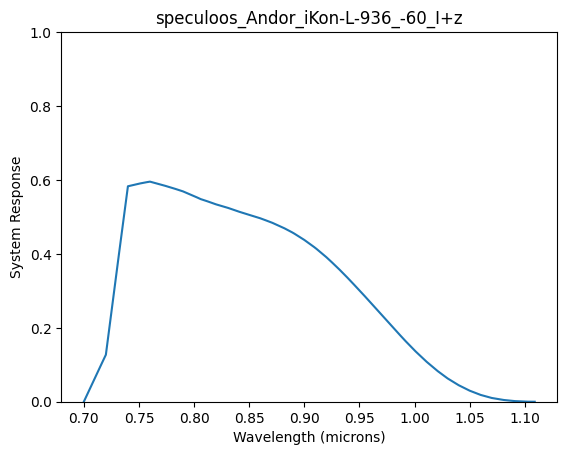

In [3]:
system_response.plot(
    xlabel="Wavelength (microns)", ylabel="System Response", title=name, ylim=(0, 1)
)

In [4]:
# sky properties
props_sky = {
    "pwv": 2.5,  # PWV [mm]
    "airmass": 1.1,  # airmass
    "seeing": 1.35,  # seeing (==FWHM) ["]
}

# instrument properties
props_instrument = {
    "name": name,  # name to get SR/precision grid from file
    "plate_scale": 0.35,  # pixel plate scale ["]
    "N_dc": 0.2,  # dark current [e/pix/s]
    "N_rn": 6.328,  # read noise [e_rms/pix]
    "well_depth": 64000,  # well depth [e/pix]
    "well_fill": 0.7,  # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time": 10.5,  # read time between images [s]
    "r0": 0.5,  # radius of telescope's primary mirror [m]
    "r1": 0.14,  # radius of telescope's secondary mirror [m]
    # "min_exp" : 0,          # optional, minimum exposure time [s]
    # "max_exp" : 120,        # optional, maximum exposure time [s]
    # "ap_rad" : 3            # optional, aperture radius [FWHM, seeing] for photometry -- 3 default == 7 sigma of Gaussian
}

In [5]:
# get the precision and components used to calculate it (generates grid if not already present)
result = mphot.get_precision_gaia(
    props_instrument, props_sky, source_id=2635476908753563008, Teff=2556
)

mphot.display_results(result)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


,single frame [ppt],10 minute binned [ppt]
,speculoos_Andor_iKon-L-936_-60_I+z,speculoos_Andor_iKon-L-936_-60_I+z
All,1.48,0.465
Star,1.14,0.358
Scintillation,0.603,0.189
Sky,0.702,0.220
Dark current,0.0833,0.0261
Read noise,0.169,0.0531


,speculoos_Andor_iKon-L-936_-60_I+z
Teff [K],2.56e+3
distance [pc],12.5
N_star [e/s],1.58e+4
star_flux [e/m2/s],2.18e+4
scn [e_rms],462
pixels in aperture [pix],421
ap_radius [pix],11.6
N_sky [e/pix/s],14.2
sky_radiance [e/m2/arcsec2/s],160
seeing [arcsec],1.35


,speculoos_Andor_iKon-L-936_-60_I+z
star [mag],13.4
sky [mag/arcsec2],18.7
vega_flux [e/s],3.62e+9


In [6]:
# extract data
image_precision, binned_precision, components = result

In [7]:
image_precision  # precision budget as fraction, x1000 for ppt

{'All': np.float64(0.001481906590608678),
 'Star': np.float64(0.0011421020119027144),
 'Scintillation': np.float64(0.0006025220992480013),
 'Sky': np.float64(0.0007021521460492511),
 'Dark current': np.float64(8.33043221298541e-05),
 'Read noise': np.float64(0.00016929267948705498)}

In [8]:
binned_precision  # precision budget as fraction, x1000 for ppt

{'All': np.float64(0.0004646192466880691),
 'Star': np.float64(0.00035808098821749036),
 'Scintillation': np.float64(0.00018890756383675743),
 'Sky': np.float64(0.0002201443756477371),
 'Dark current': np.float64(2.6118239596961008e-05),
 'Read noise': np.float64(5.3077999457963684e-05)}

In [9]:
components  # dictionary of components from calculation

{'name': 'speculoos_Andor_iKon-L-936_-60_I+z',
 'Teff [K]': 2556,
 'distance [pc]': 12.46691341544997,
 'N_star [e/s]': np.float64(15813.51991027502),
 'star_flux [e/m2/s]': np.float64(21847.22101911784),
 'scn [e_rms]': np.float64(461.91619320257604),
 'pixels in aperture [pix]': 420.6528449020946,
 'ap_radius [pix]': 11.571428571428573,
 'N_sky [e/pix/s]': np.float64(14.20879934538906),
 'sky_radiance [e/m2/arcsec2/s]': np.float64(160.24664478596628),
 'seeing [arcsec]': 1.35,
 'pwv [mm]': 2.5,
 'airmass': 1.1,
 'plate_scale ["/pix]': 0.35,
 'N_dc [e/pix/s]': 0.2,
 'N_rn [e_rms/pix]': 6.328,
 'A [m2]': 0.7238229473870883,
 'r0 [m]': 0.5,
 'r1 [m]': 0.14,
 't [s]': np.float64(48.47989350164074),
 'well_depth [e/pix]': 64000,
 'peak well_fill': 0.7,
 'binning [mins]': 10,
 'read_time [s]': 10.5,
 'binned images': np.float64(10.172958348649932),
 'altitude [m]': 2440,
 'Gaia-BP weight': np.float64(0.0),
 'Gaia-G weight': np.float64(0.0),
 'Gaia-RP weight': np.float64(0.5298429316925495)

In [10]:
# extract exposure time
exposure_time = components["t [s]"]
exposure_time

np.float64(48.47989350164074)